<a href="https://colab.research.google.com/github/mavela/RF_feature_importance/blob/master/RF_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys
import gzip
import numpy as np
import re
from sklearn.metrics import classification_report
import sklearn.feature_extraction
import json
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston
from joblib import dump, load


In [ ]:
import pandas as pd 
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)



In [1]:
! git clone https://github.com/mavela/RF_feature_importance.git

Cloning into 'RF_feature_importance'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 3), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [2]:
% cd RF_feature_importance/

/content/RF_feature_importance


In [22]:
def read_scores(file):
  name = []
  fin = open(file, "r")
  for line in fin:
    line=float(line.strip())
    name.append(line)
  return name

def read_feats(file):
  to_return = []
  fin = open(file, "r")
  for line in fin:
    line=line.strip().split(" ")
    line=[float(x) for x in line]
    to_return.append(line)
  to_return_ar = np.array(to_return)
  return to_return_ar


In [26]:
scores_test = read_scores("scores_test.txt")
scores_train = read_scores("scores_train.txt")

feats_test = read_feats("feats_test.txt")
feats_train = read_feats("feats_train.txt")

In [4]:
clf = load('randomregre_model.joblib')  #upload model

In [77]:
topic_names = [*range(0,180)] # create names for the topics
print(topic_names)
print(len(topic_names))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
180


<BarContainer object of 180 artists>

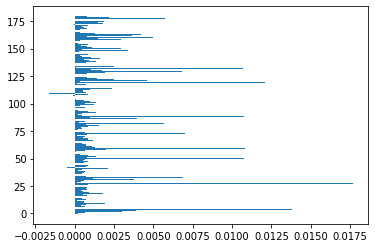

In [78]:
from matplotlib import pyplot as plt

perm_importance = permutation_importance(clf, feats_train, scores_train) # count importance scores 

#print("perm_imortance", perm_importance)

sorted_names_score = sorted(zip(topic_names, perm_importance.importances_mean), key=lambda x: x[1], reverse=True) # combine topic names to topic importance scores and sort

sorted_topics =  [i[0] for i in sorted_names_score] # make sorted topics a separate list
sorted_scores =  [i[1] for i in sorted_names_score] # make sorted scores a separate list

#print(sorted_topics) # check they're ok
#print(sorted_scores)

#sorted_idx = perm_importance.importances_mean.argsort() # the feats (i.e. topics) are ranked here from best onwards

plt.barh(sorted_topics, sorted_scores) # printti ei ole hyvä, täytyy viilata
#plt.xlabel("Permutation importance")

In [ ]:
import pandas as pd
print(len(topic_names))
print(len(feats_train))
#for line in feats_train:
#  print(len(line))

X = pd.DataFrame(feats_train, columns=topic_names) # make trainfeats into a dataframe
#print(X)

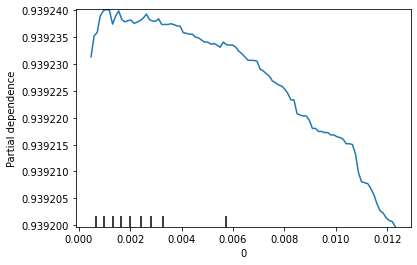

In [81]:
from sklearn.inspection import PartialDependenceDisplay
topic = [0] # this is the topic (feature) we're looking at
PartialDependenceDisplay.from_estimator(clf, X, topic)

## Then comes the classification part

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# get data, labels and model from server similar to above

"""
this is what we tested
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(rf.score(X,y)) #this is accuracy

print(classification_report(y_test, y_pred))
"""

In [ ]:
# get topic names like above

In [ ]:
# count scores like above


"""
this is what we had for test
perm_importance = permutation_importance(rf, X_test, y_test)
#print("perm_imortance", perm_importance)
sorted_idx = perm_importance.importances_mean.argsort()
#print("sorted", sorted_idx)
irisnames_array = np.array(iris.feature_names)
plt.barh(irisnames_array[sorted_idx], perm_importance.importances_mean[sorted_idx]) # change color
plt.xlabel("Permutation importance")
"""

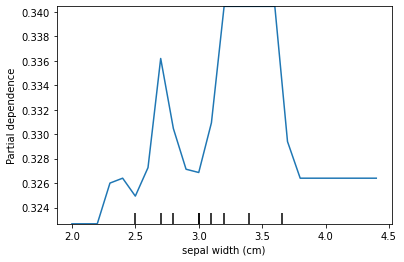

In [43]:
from sklearn.inspection import PartialDependenceDisplay
# ks https://scikit-learn.org/stable/modules/partial_dependence.html

features = [1] # tämä on topiikki
PartialDependenceDisplay.from_estimator(rf, X, features, target=1) # target on luokkanumero, oikein vai väärin